<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Autocorrelation and time series decomposition practice



---

### Take the AAPL stock data

- Extract the closing prices 
- Decompose the time series 
- Investigate for (partial) autocorrelations

**Bonus:** Resample the data weekly or difference the time series and repeat the same steps.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
def autocorr_plots(y, lags=None):
    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
    plot_acf(y, lags=lags, ax=ax[0])
    plot_pacf(y, lags=lags, ax=ax[1])
    return fig, ax

In [4]:
df = pd.read_csv('datasets/aapl.csv')

In [5]:
df['Date'] = pd.to_datetime(df.Date)
df.sort_values(by='Date',inplace=True)
df.set_index('Date',inplace=True)

df.index.name = None
df.head()

,Open,High,Low,Close,Volume
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


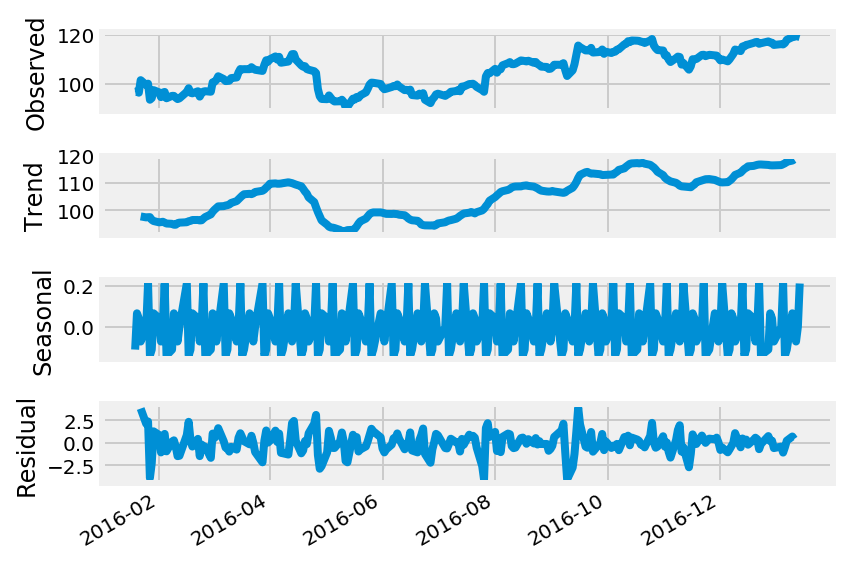

In [6]:
seasonal_decompose(df.Close,freq=7).plot();

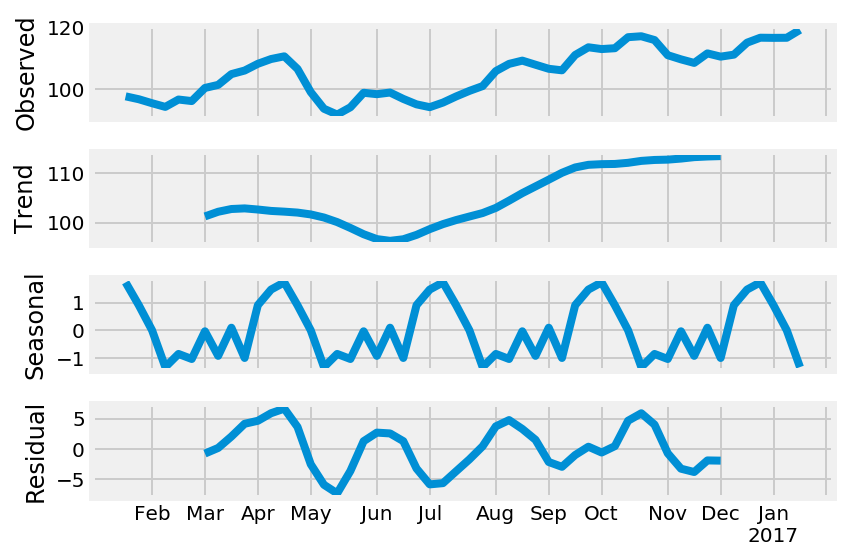

In [7]:
seasonal_decompose(df.Close.resample('W').mean(),freq=12).plot();

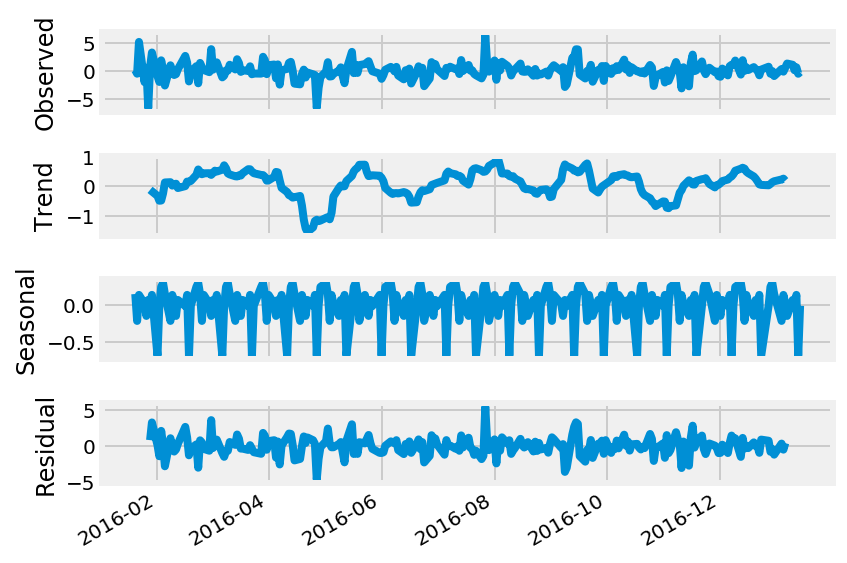

In [8]:
seasonal_decompose(df.Close.diff()[1:],freq=12).plot();

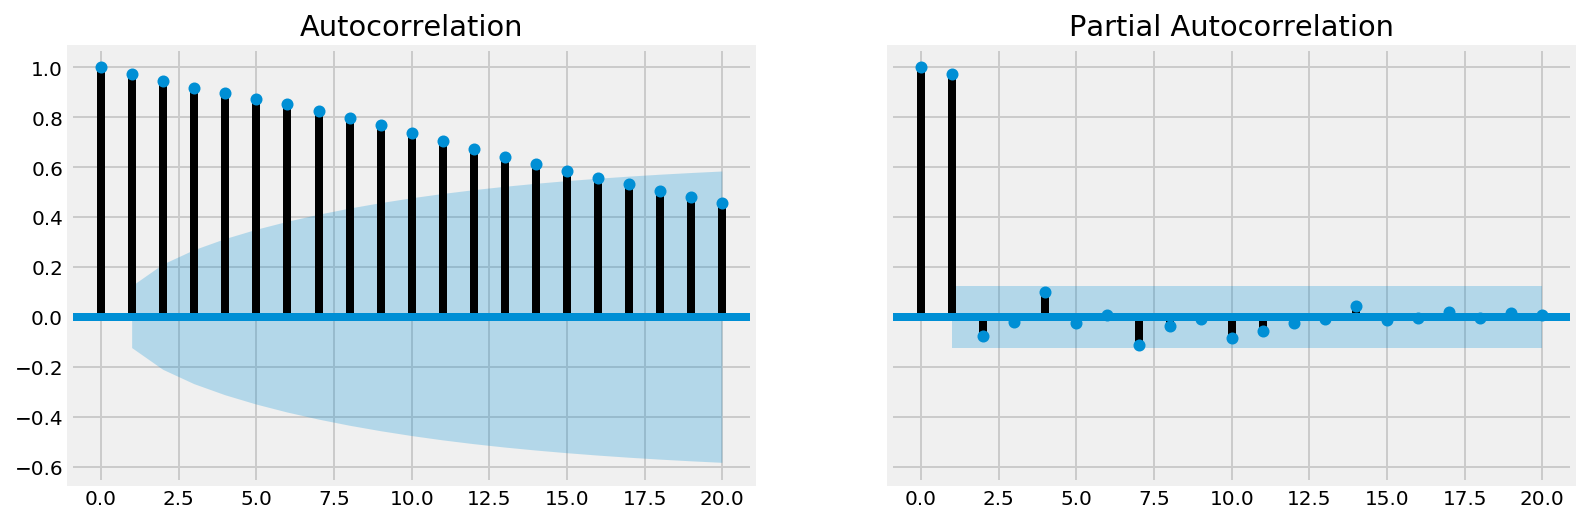

In [9]:
fig, ax = autocorr_plots(df.Close,lags=20)

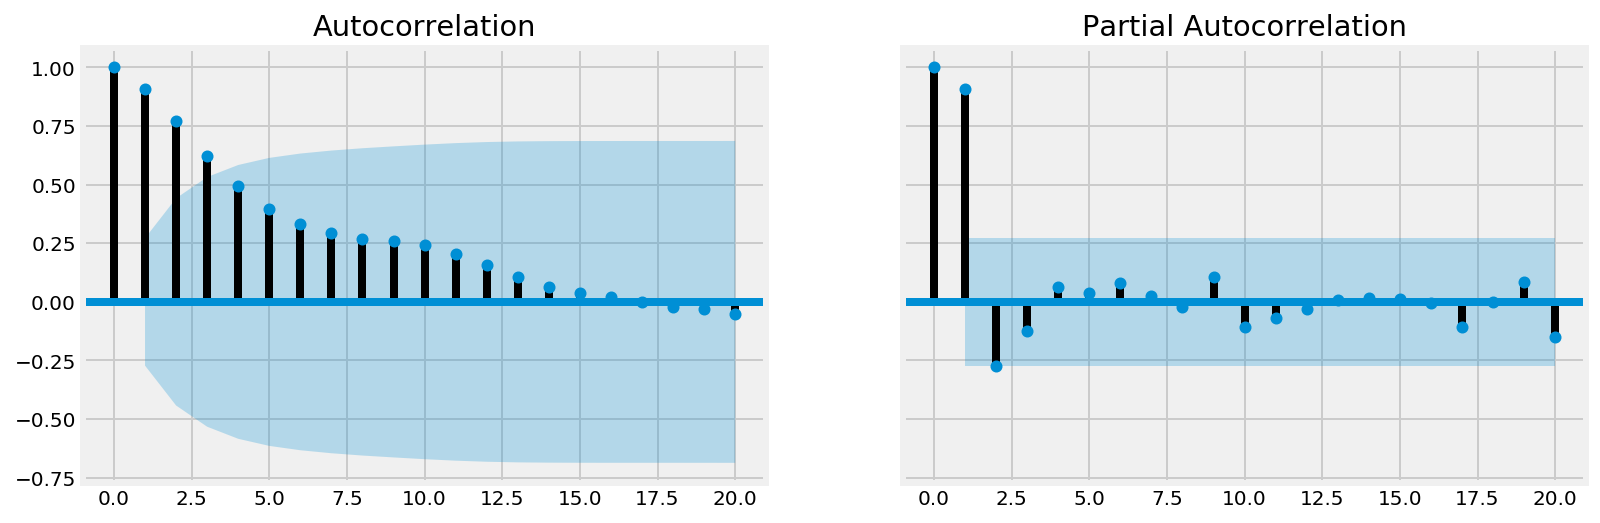

In [10]:
fig, ax = autocorr_plots(df.Close.resample('W').mean(),lags=20)

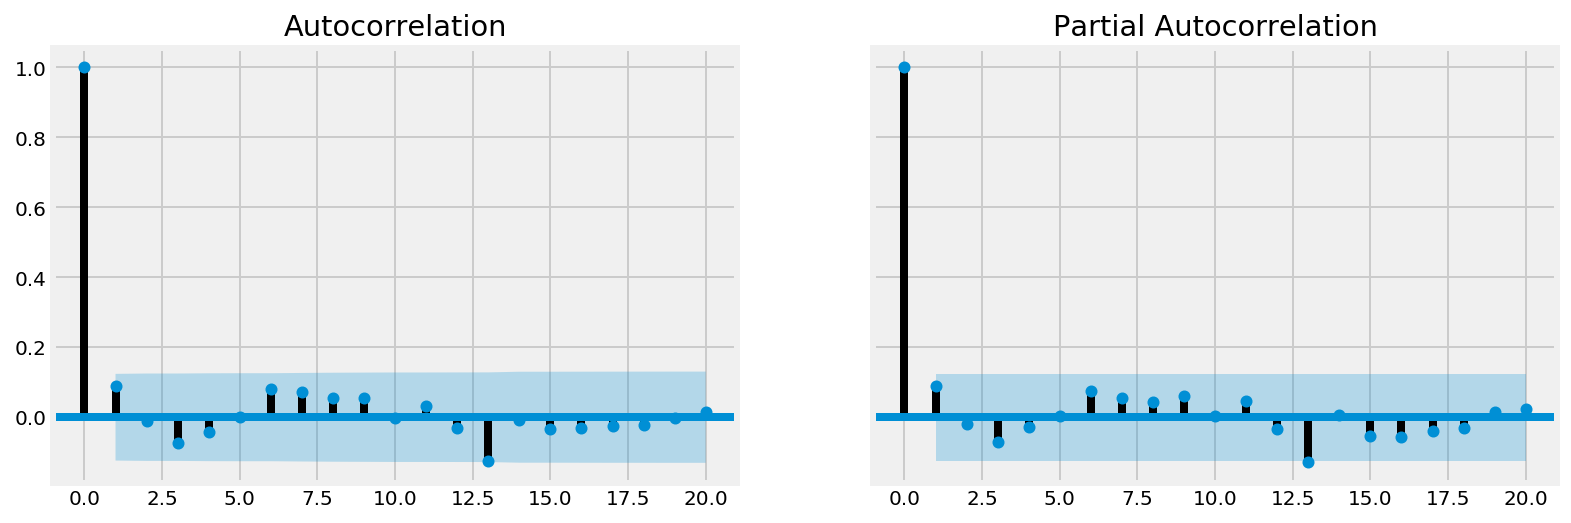

In [11]:
fig, ax = autocorr_plots(df.Close.diff()[1:],lags=20)